In [ ]:
import numpy as np
from numpy import linalg
import scipy as sp
import math
from scipy.integrate import odeint
#from matplotlib import animation, rc
from IPython.display import HTML

import plotly.graph_objects as go
from sympy import *

In [ ]:
class mugas_vibration_functions:
  
    def __init__(self): 
        self=[];

    def dynamicSystemModel(self, X, t, A, B, cParameters):
        dXdt=A @ X + B * self.controlFn(t, cParameters);
        self.X=X;
        return dXdt

    def controlFn(self, t, cParameters):
        return cParameters[0]*np.cos(cParameters[1] * t)

    def simulateDySystem(self, Tmax, dT, X0, A,B, cParameters, xLabel, yLabel):
        t = np.linspace(0, Tmax, int(Tmax/dT+1))
        sol = odeint(self.dynamicSystemModel, X0, t, args=(A, B, cParameters));
        self.soln=sol;
        fig = go.Figure()
        [nt,nS]=sol.shape;

        # Add traces
        for nn in range(nS):
            fig.add_trace(go.Scatter(x=t, y=sol[:,nn], mode='lines+markers', name='x'+str(nn+1)))
            fig.update_layout(xaxis=dict(title=xLabel),yaxis=dict(title=yLabel))
        
        fig.show()
        return [t,sol,fig] 
    
    def animate_particle_motion(self, XX, axisRange, figTitle):
        xx=[jj[0] for jj in XX]
        yy=[jj[1] for jj in XX]
        zz=[jj[2] for jj in XX]

        fig = go.Figure(
            data=[go.Scatter3d(x=[xx[0]], y=[yy[0]],z=[zz[0]],
                            mode="markers",
                            marker=dict(color="red", size=10)),
                go.Scatter3d(x=xx, y=yy,z=zz, name='Path',
                            mode="lines",
                            line=dict(color="blue", width=2))],
            layout=go.Layout(
                scene = dict(
                            xaxis=dict(range=axisRange[0], autorange=False),
                            yaxis=dict(range=axisRange[1], autorange=False),
                            zaxis=dict(range=axisRange[2], autorange=False),
                            aspectratio=dict(x=1, y=1, z=1),
                ),
                title_text=figTitle, hovermode="closest",
                updatemenus=[dict(type="buttons",
                                buttons=[dict(label="Play",
                                                method="animate",
                                                args=[None])])]),
            frames=[go.Frame(
                data=[go.Scatter3d(
                    x=[p[0]],
                    y=[p[1]],
                    z=[p[2]],
                    name='Particle',
                    mode="markers",
                    marker=dict(color="red", size=10))])

                for p in XX]
        )

        fig.show()
        return fig

    def animate_2D_scatter_plot(self, x, YY, xlabel, ylabel, title):
        fig = go.Figure(data=[go.Scatter(x=x,y=YY[0,:])],
                layout=go.Layout(
                    xaxis={'title':xlabel},
                    yaxis={'title':ylabel,'range':[1.1*YY.min(),1.1*YY.max()]},
                    title={'text':title,'y':0.9,'x':0.5, 'xanchor': 'center','yanchor': 'top'},
                    scene = dict(aspectratio=dict(x=1, y=1)),    
                    hovermode="closest",
                    updatemenus=[dict(type="buttons",
                                    buttons=[dict(label="Play",
                                                    method="animate",
                                                    args=[None])])]
                    ),
            frames=[go.Frame(data=[go.Scatter(x=x,y=y)]) for y in YY]
        )

        #fig.show()
        return fig

In [ ]:
mv=mugas_vibration_functions()

In [ ]:
#Steel, Structural ASTM-A36
a=1e-2; b=5e-3;
E=200e9 #GPa
I=(a*b**3)/12
rho=7850 #kg/m^3
P=100 #N
L=1 #m
A=a*b
f_0=1e-1
omega=2*np.pi*50

## Whirling of a shaft

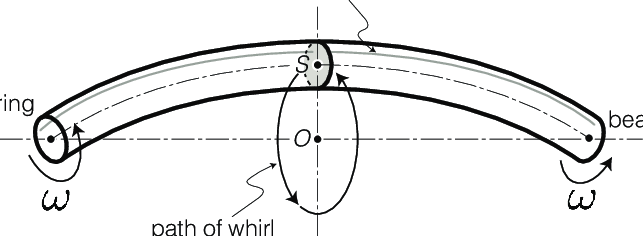

One can show that the transverse deflection
of the rotating shaft can be approximately modeled by
\begin{align*}
{{\partial^2 y} \over {\partial t^2}} +\frac{EI} {\rho A}{{\partial^4 y} \over {\partial x^4}}-\frac{EI}{\kappa G A} {{\partial^4 y} \over {\partial t^2\partial x^2}}&=q(t,x).
\end{align*}
The shaft is simply supported at the ends and hence satisfy the boundary conditions
\begin{align*}
y(0,t)&=0,\:\:\:\:\:\:\: y(L,t)=0,\\
{\partial^2 y \over \partial x^2}(0,t)&=0,\:\:\:\:\:\:\: {\partial^2 y \over \partial x^2}(L,t)=0.
\end{align*}

Again wesee that this equation can be written as

\begin{align}{{\partial^2 y} \over {\partial t^2}} +Hy&=q(t,x)\end{align}

where 


\begin{align} 
H&=\frac{EI} {\rho A}{{\partial^4} \over {\partial x^4}}-\frac{EI}{\kappa G A} {{\partial^4} \over {\partial t^2\partial x^2}}
\end{align}

is a linear operator on the infintie dimensional vector space of four times differentiable functions defined on the interval $[0,L]$ that will denote by $\mathcal{F}$.